<a href="https://colab.research.google.com/github/sheykh-8/object-detection-with-yolo/blob/main/yolov5_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model repository cloning and installing the dependencies

In [ ]:
# Mount google drive
# Clone Yolo repository
# Place the dataset in the correct position relative to the model for trainin
# Start the trainng process for YoloV5

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# cd to the mounted drive and clone the repository that contains the yolov5 codes:
! git clone https://github.com/ultralytics/yolov5 /content/drive/MyDrive/Yolo/yolov_5

Cloning into '/content/drive/MyDrive/Yolo/yolov_5'...
remote: Enumerating objects: 16725, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 16725 (delta 140), reused 152 (delta 70), pack-reused 16459
Receiving objects: 100% (16725/16725), 15.41 MiB | 10.86 MiB/s, done.
Resolving deltas: 100% (11443/11443), done.
Updating files: 100% (148/148), done.


In [1]:
# install the dependencies for yolov5
%cd /content/drive/MyDrive/Yolo/yolov_5

!pip install -r requirements.txt

/content/drive/MyDrive/Yolo/yolov_5


# Training yolo-5 with the satelite dataset

using the pre-trained yolo5 weights to increase the chances of better convergence.

In [2]:
%cd /content/drive/MyDrive/Yolo/yolov_5

/content/drive/MyDrive/Yolo/yolov_5


In [3]:
!cat data/data.yaml

names:
- airliner
- boat
- bus
- car
- long_vehicle
- other
- pushback_truck
- stair_truck
- truck
- van
nc: 10
roboflow:
  license: CC BY 4.0
  project: sat-knxi4
  url: https://universe.roboflow.com/afshin-eg77l/sat-knxi4/dataset/1
  version: 1
  workspace: afshin-eg77l
path: data
test: test/images
train: train/images
val: valid/images


In [4]:
!python train.py --img 640 --epochs 80 --data data/data.yaml --patience 5 --weights yolov5m.pt --save-period 3

2024-07-04 16:47:36.974270: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 16:47:36.974320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 16:47:36.979090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, 

We started the training process aiming for 80 epochs with early stopping to stop the model if the results weren't improving and we hit the plateau.
in the first training round, we used a batch size of 16.
Let's see if we can get a better result by increasing the batch size to 64 the next round.

In [6]:
!python train.py --img 640 --epochs 80 --data data/data.yaml --patience 5 --weights yolov5m.pt --save-period 3 --batch-size 32

2024-07-04 18:12:24.278009: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 18:12:24.278065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 18:12:24.280071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, 

let's plot the results from both runs next:

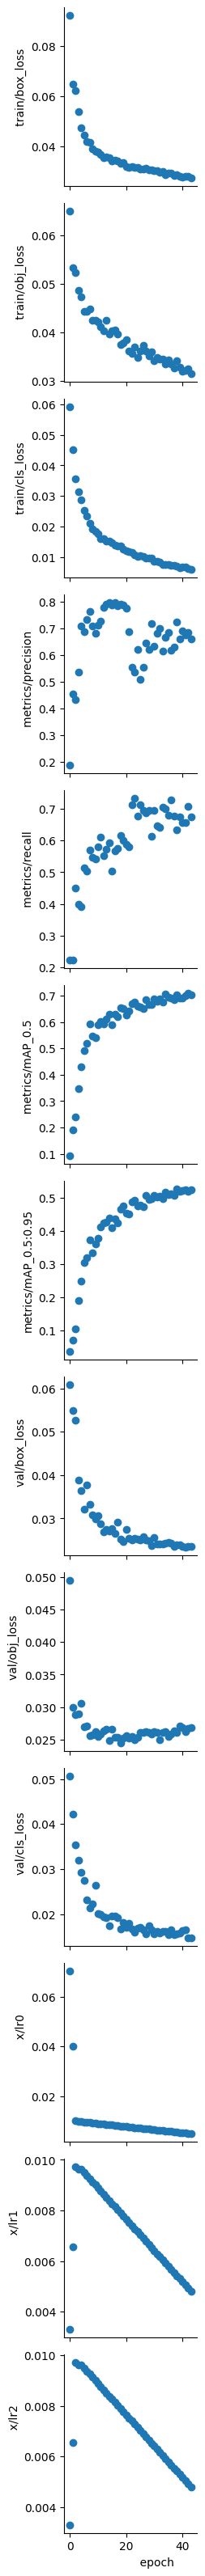

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# results from the first train session:
df = pd.read_csv('runs/train/exp13/results.csv')

grid = sns.PairGrid(df, x_vars='               epoch', y_vars=df.columns[df.columns != "               epoch"])
grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter);
plt.show()

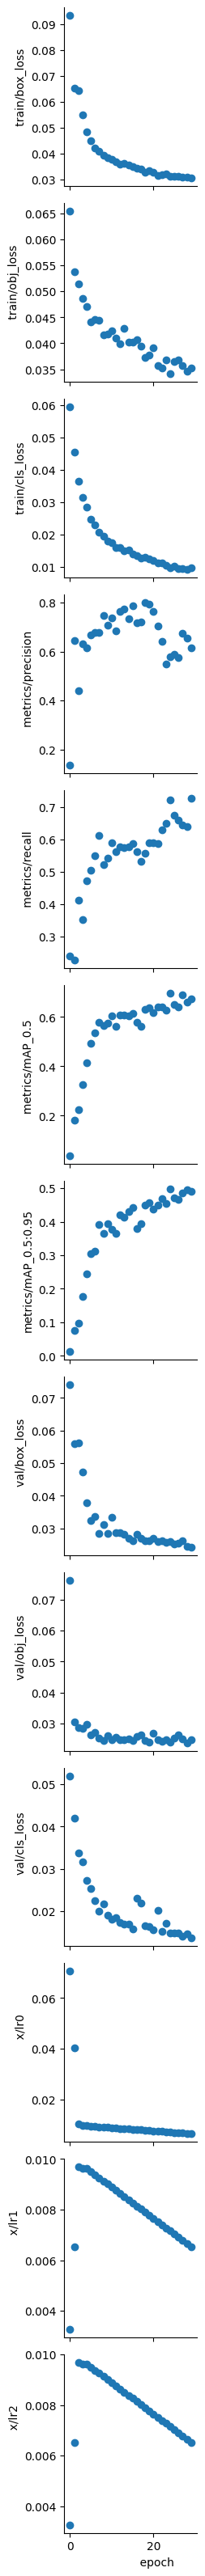

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# results from the second train session:
df = pd.read_csv('runs/train/exp15/results.csv')

grid = sns.PairGrid(df, x_vars='               epoch', y_vars=df.columns[df.columns != "               epoch"])
grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter);
plt.show()

Even though I expected the second run with bigger batch sizes to have a better performance after training, it seems like the first model is having a better performance after training.

There seems to be a lot of fluctuations in the last epochs of the second run which can be an indication of unreached convergence and maybe if early stopping didn't stop the model, it could reach a way better final state as some epochs showed during the training.

so maybe in the next session, we can train yolo5 with batch size of 32-40 for 50 epochs wihtout early stopping.

# Training the improved yolo 5

Our improved version of yolo 5 utilizes InceptionNeXt modules in its convolutional back-bone.
lets see how this modification in yolo-5 architecture affects the training results of the model on our dataset.